In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans , k_means
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("super_store_data.csv")

In [3]:
dataset.head(5)

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [4]:
dataset.shape

(896, 4)

### Distribution of Data

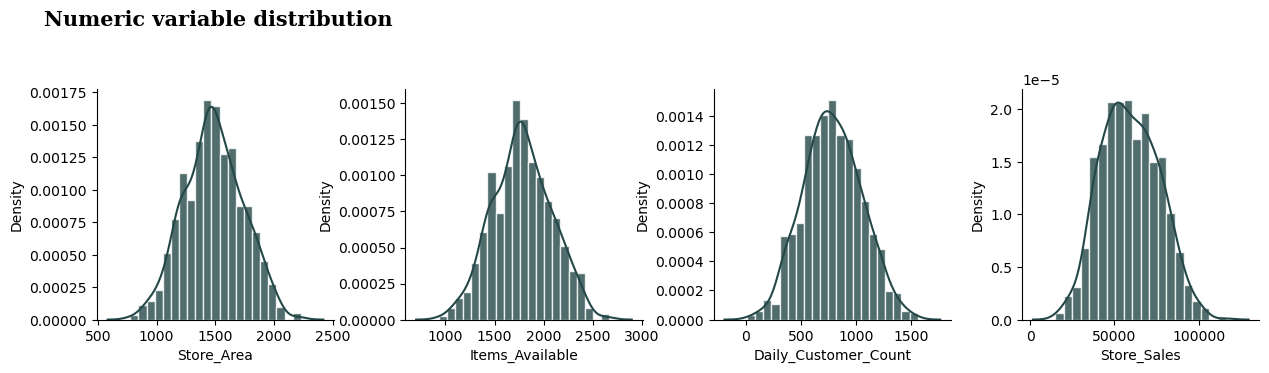

In [5]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(1, 4)

fig = plt.figure(figsize=(15, 3))


fig.text(0.09, 1.09, 'Numeric variable distribution', fontsize=15, fontweight='bold', fontfamily='serif')


ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
ax1 = sns.distplot(dataset["Store_Area"],color='#244747',hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.8))

ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
ax2 = sns.distplot(dataset["Items_Available"],color='#244747',hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.8))

ax3 = fig.add_subplot(gs[0, 2]) # row 1, span all columns
ax3 = sns.distplot(dataset["Daily_Customer_Count"],color='#244747',hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.8))

ax4 = fig.add_subplot(gs[0, 3]) # row 1, span all columns
ax4 = sns.distplot(dataset["Store_Sales"],color='#244747',hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.8))


sns.despine()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None) # useful for adjusting space between subplots

### Feature Selection, Drop feature using Pearson Correlation

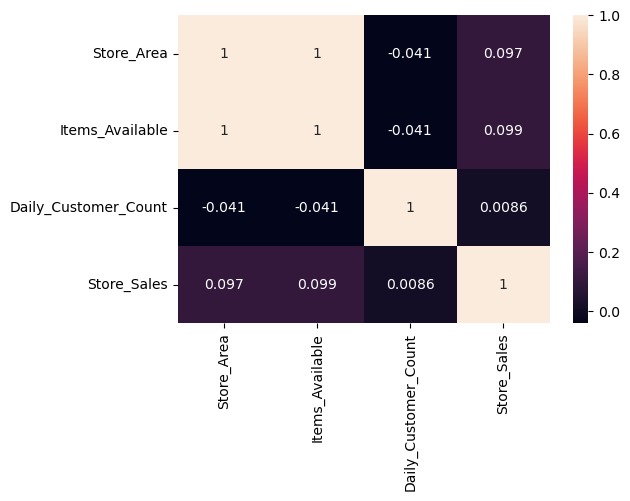

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store_Area,1.000000,0.998891,-0.041423,0.097474
Items_Available,0.998891,1.000000,-0.040978,0.098849
Daily_Customer_Count,-0.041423,-0.040978,1.000000,0.008629
Store_Sales,0.097474,0.098849,0.008629,1.000000


In [6]:
plt.figure(figsize=(6, 4))
cor = dataset.corr()
sns.heatmap(cor, annot=True)
plt.show()
dataset.corr()

In [7]:
# with the folling function we can select highly correlated features and remove the feature

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix =dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
    

In [8]:
corr_features = correlation(dataset, 0.7)
len(set(corr_features))

1

In [9]:
corr_features

{'Items_Available'}

In [10]:
df = dataset.drop(corr_features, axis=1)

In [11]:
df.head(5)

,Store_Area,Daily_Customer_Count,Store_Sales
0,1659,530,66490
1,1461,210,39820
2,1340,720,54010
3,1451,620,53730
4,1770,450,46620


### Outlier dection and removel using IQR

<AxesSubplot:xlabel='Store_Area'>

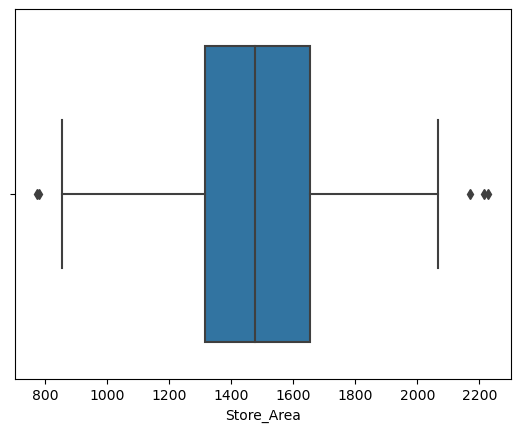

In [12]:
sns.boxplot(df['Store_Area'])

In [13]:
Q1 = df.Store_Area.quantile(0.25)
Q3 = df.Store_Area.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df[(df.Store_Area<lower_limit)|(df.Store_Area>upper_limit)]

,Store_Area,Daily_Customer_Count,Store_Sales
91,2169,600,67080
158,775,1090,42530
466,2229,660,87410
540,2214,740,65900
865,780,790,25600


In [14]:
df = df[(df.Store_Area>lower_limit)&(df.Store_Area<upper_limit)]
df

,Store_Area,Daily_Customer_Count,Store_Sales
0,1659,530,66490
1,1461,210,39820
2,1340,720,54010
3,1451,620,53730
4,1770,450,46620
...,...,...,...
891,1582,1080,66390
892,1387,850,82080
893,1200,1060,76440
894,1299,770,96610


In [15]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scaled_df = scalar.fit_transform(df)

### MODELING : K-MEANS

In [16]:
# RUNNING K-MEANS

# START WITH 6 CLUSTERS FOR EXPLORATION
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans = kmeans.fit(scaled_df)

# PRINT THE CLUSTERS THAT IS ASSIGNED FOR EACH OBSERVATION
print("The cluster are  :", kmeans.labels_)

# PRINT INERTIA
print("The Inertia is :", kmeans.inertia_)

The cluster are  : [0 0 5 0 1 5 3 5 5 5 3 1 4 4 3 2 4 1 4 1 0 0 4 0 5 2 4 4 2 2 3 5 3 2 3 1 1
 3 4 0 4 5 2 1 5 5 2 4 4 3 3 4 0 2 4 5 4 3 2 1 0 1 1 3 0 2 1 0 1 5 1 5 5 3
 2 2 5 4 1 0 5 3 0 4 3 0 2 5 5 1 2 2 1 5 4 1 4 4 2 4 3 2 3 3 4 3 2 2 1 5 4
 3 4 4 4 0 3 1 4 1 3 1 0 2 5 2 1 1 3 0 4 3 4 1 4 1 1 1 0 3 1 2 5 1 0 4 0 5
 5 4 5 0 2 1 5 0 4 0 5 4 1 5 0 2 1 5 3 5 5 0 5 3 5 1 1 5 0 0 1 4 2 5 2 2 3
 0 4 4 3 1 3 4 4 2 1 2 4 3 0 5 0 3 3 5 4 1 1 0 4 1 0 3 0 2 3 1 2 4 3 0 0 1
 0 4 2 2 4 2 0 3 0 4 5 4 3 4 5 3 1 2 3 1 0 2 3 4 3 3 1 1 5 1 1 4 1 0 2 5 2
 5 5 5 3 2 5 3 4 1 5 1 5 1 4 0 4 4 4 4 2 5 5 1 4 5 2 5 0 1 4 1 5 3 5 0 4 0
 5 5 3 5 0 4 3 0 3 0 1 0 0 2 1 2 4 1 0 3 3 5 0 3 5 0 5 1 3 4 4 1 1 4 5 0 5
 4 4 2 5 0 0 3 2 1 2 3 1 1 2 1 3 4 0 4 5 4 4 0 2 1 5 4 1 5 1 0 5 4 3 4 4 2
 0 4 4 1 2 3 3 5 0 1 2 5 5 3 1 3 4 4 5 3 4 3 3 2 5 1 4 5 1 2 2 0 4 1 2 4 3
 2 3 4 4 4 1 5 4 3 4 4 4 3 0 3 3 4 4 4 4 1 2 0 1 0 3 3 3 4 2 0 4 2 2 0 4 4
 2 4 3 1 3 2 3 2 3 1 0 5 0 5 5 3 1 1 1 0 5 1 2 3 3 2 2 4 3 1 1 4 0 3 1 5 1
 4 1 1

In [17]:
# RUNNING K-MEANS ON A RANG OF CLUSTERS TO FIND OPTIMAL NUMBER
no_of_clusters = range(2,10)
inertia =[]

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=42)
    kmeans = kmeans.fit(scaled_df)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f , "Cluster is : " , u)

The inertia for : 2 Cluster is :  2051.042754949007
The inertia for : 3 Cluster is :  1644.0867926896483
The inertia for : 4 Cluster is :  1362.1230699194343
The inertia for : 5 Cluster is :  1180.3345935266682
The inertia for : 6 Cluster is :  1043.4742506383723
The inertia for : 7 Cluster is :  954.4262313797682
The inertia for : 8 Cluster is :  876.6582051484022
The inertia for : 9 Cluster is :  811.7248036838683


Text(0.5, 1.0, 'Inertia Plot per k')

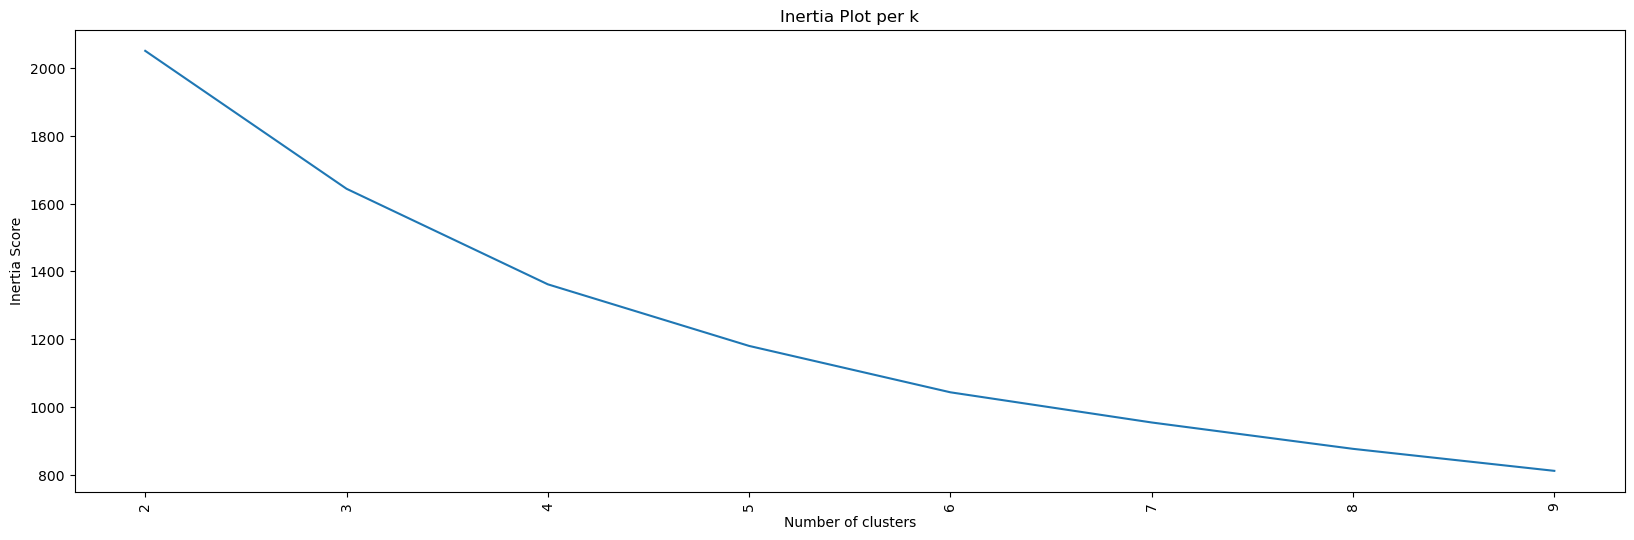

In [18]:
# CREATING SCREE PLOT TO VISUALIZE INERTIA - ELBOW METHOD
fig, (ax1) = plt.subplots(1, figsize =(20,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation ="vertical")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Score")
plt.title("Inertia Plot per k")

Understanding that the inertia score start to drop drastically between 4 - 5 number of cluster. Thefore, I have decided to choose 4 number of cluster to grain granularity on our study

In [19]:
# RE-RUNNNG K-MEANS ON 4 CLUSTERS
kmeans = KMeans(n_clusters=4, random_state=2)
kmeans = kmeans.fit(scaled_df)

kmeans.labels_

# PREDICTIONS FOR NEW DATA
predictions = kmeans.predict(scaled_df)

# CALCULATING THE COUNTS FOR THE CLUSTER
unique , counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,4)

# CREATING THE PLOT
countdf = pd.DataFrame(counts, columns=["Cluster 0 ", "Cluster 1" , "Cluster 2", "Cluster 3"])

# DISPLAY THE PLOT
countdf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,225,236,201,234


In [20]:
kmeans.labels_

array([0, 1, 1, 1, 1, 1, 2, 3, 1, 3, 2, 0, 0, 3, 2, 0, 3, 1, 3, 0, 1, 2,
       0, 1, 3, 0, 3, 3, 0, 0, 2, 3, 3, 0, 2, 0, 1, 3, 0, 1, 3, 1, 0, 0,
       1, 3, 0, 0, 3, 2, 2, 3, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0,
       0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 3, 3, 2, 1, 2, 1, 3, 2, 1, 0, 3,
       3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 2, 0, 2, 2, 3, 2, 0, 0, 1, 3,
       3, 2, 0, 3, 0, 2, 2, 1, 3, 0, 2, 3, 1, 0, 1, 0, 0, 0, 2, 2, 3, 2,
       3, 0, 3, 1, 0, 0, 0, 2, 0, 0, 1, 1, 1, 3, 1, 1, 3, 0, 1, 1, 2, 1,
       1, 1, 3, 1, 3, 3, 0, 1, 2, 0, 0, 1, 2, 1, 3, 2, 3, 2, 1, 1, 1, 1,
       2, 0, 1, 3, 0, 3, 0, 0, 2, 1, 3, 3, 2, 1, 2, 0, 3, 0, 0, 0, 3, 2,
       1, 3, 2, 2, 2, 3, 3, 0, 1, 1, 3, 1, 1, 2, 0, 0, 2, 1, 0, 3, 2, 2,
       1, 1, 1, 3, 0, 0, 0, 0, 2, 2, 1, 3, 1, 3, 2, 0, 1, 2, 0, 0, 3, 1,
       1, 0, 2, 3, 2, 2, 0, 1, 1, 0, 1, 3, 1, 1, 2, 2, 0, 1, 3, 3, 2, 0,
       3, 2, 3, 0, 3, 1, 1, 0, 3, 1, 0, 3, 3, 3, 0, 1, 1, 1, 3, 3, 0, 3,
       1, 1, 3, 0, 1, 3, 1, 1, 3, 2, 1, 1, 2, 1, 1,

In [21]:
predictions

array([0, 1, 1, 1, 1, 1, 2, 3, 1, 3, 2, 0, 0, 3, 2, 0, 3, 1, 3, 0, 1, 2,
       0, 1, 3, 0, 3, 3, 0, 0, 2, 3, 3, 0, 2, 0, 1, 3, 0, 1, 3, 1, 0, 0,
       1, 3, 0, 0, 3, 2, 2, 3, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0,
       0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 3, 3, 2, 1, 2, 1, 3, 2, 1, 0, 3,
       3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 2, 0, 2, 2, 3, 2, 0, 0, 1, 3,
       3, 2, 0, 3, 0, 2, 2, 1, 3, 0, 2, 3, 1, 0, 1, 0, 0, 0, 2, 2, 3, 2,
       3, 0, 3, 1, 0, 0, 0, 2, 0, 0, 1, 1, 1, 3, 1, 1, 3, 0, 1, 1, 2, 1,
       1, 1, 3, 1, 3, 3, 0, 1, 2, 0, 0, 1, 2, 1, 3, 2, 3, 2, 1, 1, 1, 1,
       2, 0, 1, 3, 0, 3, 0, 0, 2, 1, 3, 3, 2, 1, 2, 0, 3, 0, 0, 0, 3, 2,
       1, 3, 2, 2, 2, 3, 3, 0, 1, 1, 3, 1, 1, 2, 0, 0, 2, 1, 0, 3, 2, 2,
       1, 1, 1, 3, 0, 0, 0, 0, 2, 2, 1, 3, 1, 3, 2, 0, 1, 2, 0, 0, 3, 1,
       1, 0, 2, 3, 2, 2, 0, 1, 1, 0, 1, 3, 1, 1, 2, 2, 0, 1, 3, 3, 2, 0,
       3, 2, 3, 0, 3, 1, 1, 0, 3, 1, 0, 3, 3, 3, 0, 1, 1, 1, 3, 3, 0, 3,
       1, 1, 3, 0, 1, 3, 1, 1, 3, 2, 1, 1, 2, 1, 1,

### MODELING :PRINCIPAL COMPONENT ANALYSIS (PCA)

Explained variance ratio (first two components): [0.36767664 0.33539734]


<Figure size 640x480 with 0 Axes>

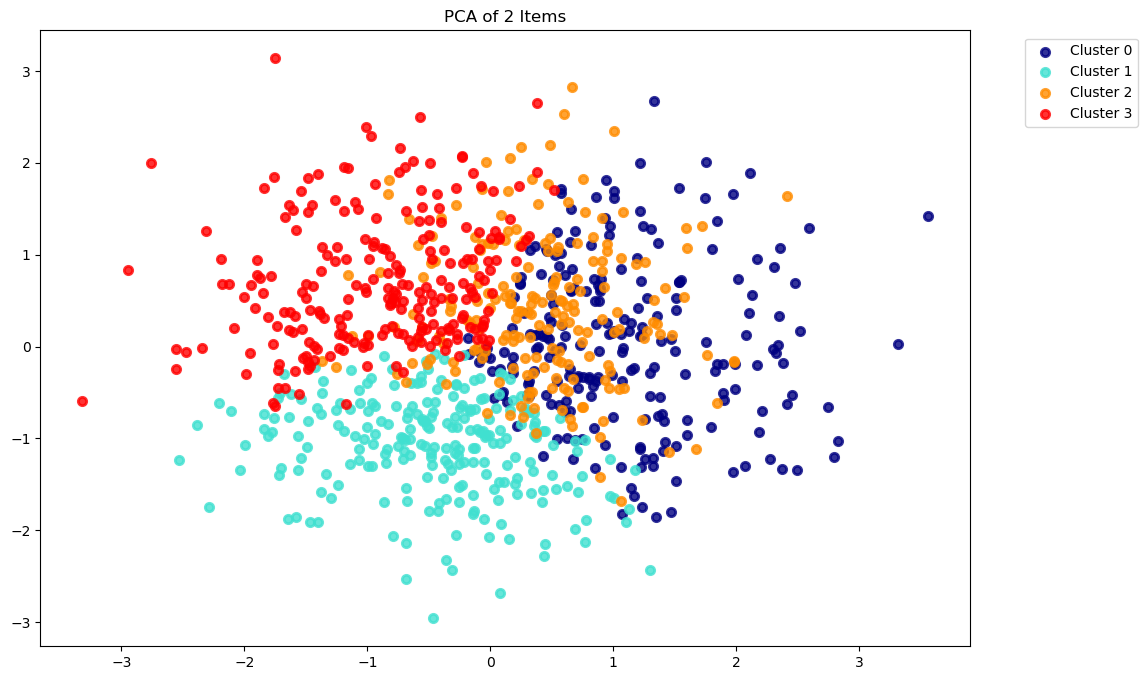

In [23]:
# RUNNING PCA TO VISUALIZE DATA
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = scaled_df
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"]

pca = PCA(n_components=2, random_state = 42)
X_r = pca.fit(X).transform(X)


# PRECENTAGE OF VARIANCE EXPLAINED FOR EACH COMPONENTS
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# PLOTTING DATA POINTS
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

In [24]:
# IDENTIFYING THE "BEST" NUMBER OF COMPONENTS : TRYING WITH DIMENTIONALITY REDUCTION & K-MEANS
n_components = X.shape[1]

# RUNNING PCA WITH ALL COMPONENTS
pca = PCA(n_components=n_components, random_state = 42)
X_r = pca.fit(X).transform(X)

# CALCULATING THE 95% VARIANCE
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# CREATING A DF WITH THE COMPONENTS & EXPLAINED VARIANCE
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# TRYING TO HIT 95% VARIANCE
print("Variance explain with 4 n_compononets: ", sum(a["Explained Variance"][0:4]))

plt.show()

Total Variance in our dataset is:  3.0033519553072616
The 95% variance we want to have is:  2.8531843575418985

Variance explain with 4 n_compononets:  3.0033519553072616


2 eigenvectors can be used to represent 95% variance

The innertia for : 2 Clusters is: 1260.0532628129492
The innertia for : 3 Clusters is: 855.6101954293267
The innertia for : 4 Clusters is: 663.7368826777007
The innertia for : 5 Clusters is: 552.2713598601331
The innertia for : 6 Clusters is: 451.77109569662355
The innertia for : 7 Clusters is: 392.9322642213208
The innertia for : 8 Clusters is: 347.2051225895257
The innertia for : 9 Clusters is: 315.35424166265756


Text(0.5, 1.0, 'Inertia Plot per k')

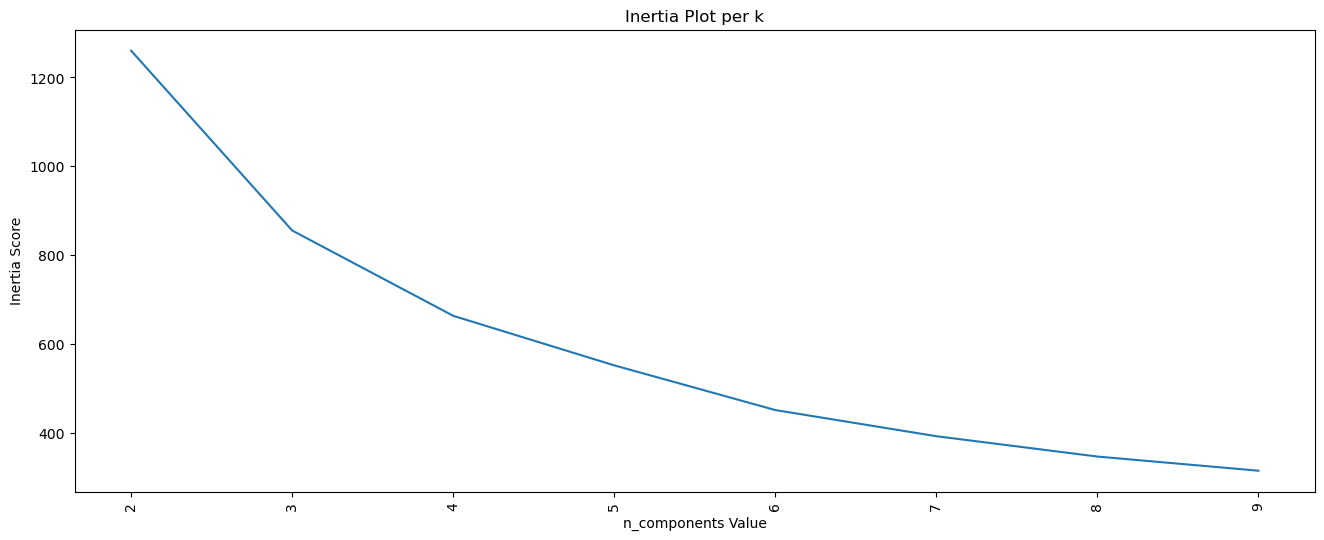

In [25]:
# RUNNING PCA AGAIN WITH 2 COMPONENTS
pca = PCA(n_components=2, random_state = 42)
X_r = pca.fit(X).transform(X)

inertia = []

# RUNNING K-MEANS
for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# CREATING SCREE PLOT TO VISUALIZE INERTIA - ELBOW METHOD
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [42]:
## FINAL STEP:

# RUNNING PCA WITH 2 COMPONENTS
pca = PCA(n_components=2, random_state=42)
X_r = pca.fit(X).transform(X)

# RUNNING K-MEANS WITH 4 CLUSTERS
kmeans1 = KMeans(n_clusters=4, random_state=2)
kmeans1 = kmeans.fit(X_r)

clusters = kmeans.labels_

# ADDING THE CLUSTERS BACK TO THE ORIGINAL DATASET
dataset['clusters'] = clusters

dataset

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,clusters
0,1659,1961,530,66490,1
1,1461,1752,210,39820,1
2,1340,1609,720,54010,3
3,1451,1748,620,53730,1
4,1770,2111,450,46620,1
...,...,...,...,...,...
891,1582,1910,1080,66390,2
892,1387,1663,850,82080,2
893,1200,1436,1060,76440,2
894,1299,1560,770,96610,0


In [28]:
cluster_centers=pd.DataFrame(data=dataset)

In [29]:
cluster_centers

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,clusters
0,1659,1961,530,66490,1
1,1461,1752,210,39820,1
2,1340,1609,720,54010,3
3,1451,1748,620,53730,1
4,1770,2111,450,46620,1
...,...,...,...,...,...
891,1582,1910,1080,66390,2
892,1387,1663,850,82080,2
893,1200,1436,1060,76440,2
894,1299,1560,770,96610,0


### visualization

<AxesSubplot:xlabel='clusters', ylabel='count'>

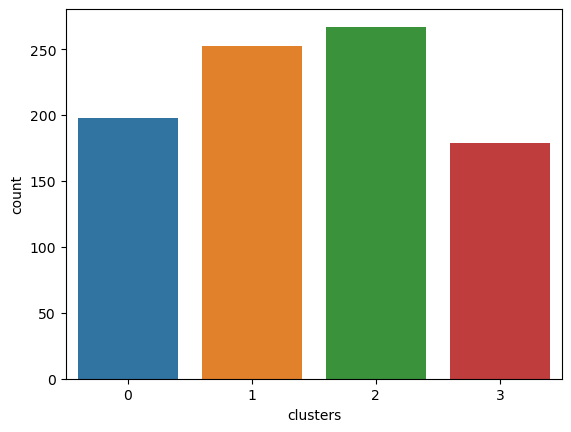

In [30]:
sns.countplot(x='clusters', data=dataset)

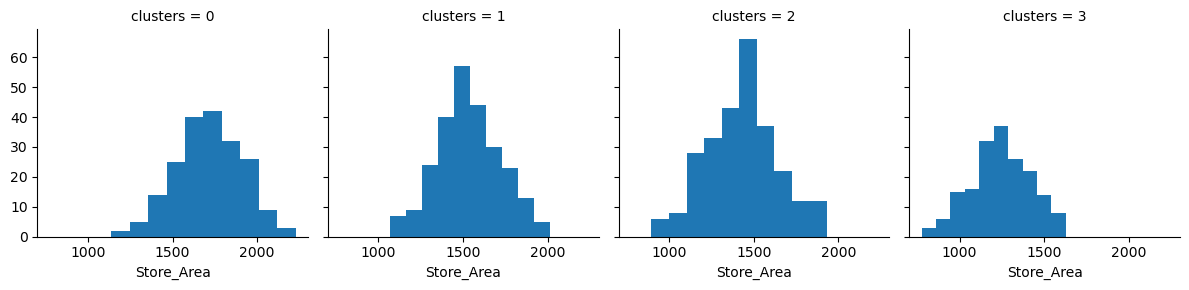

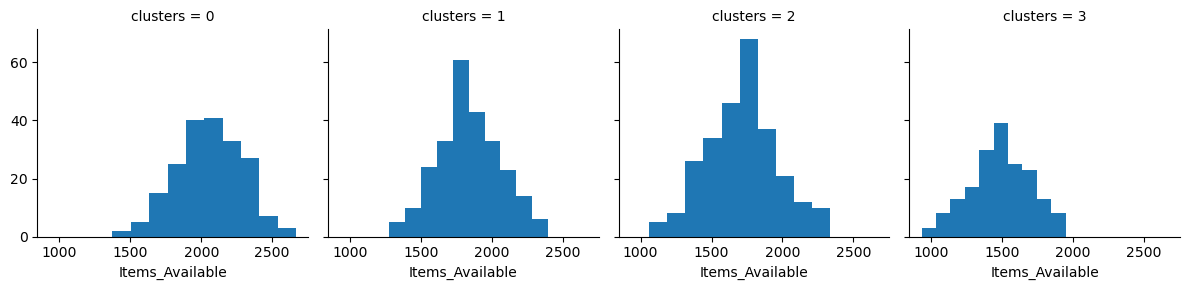

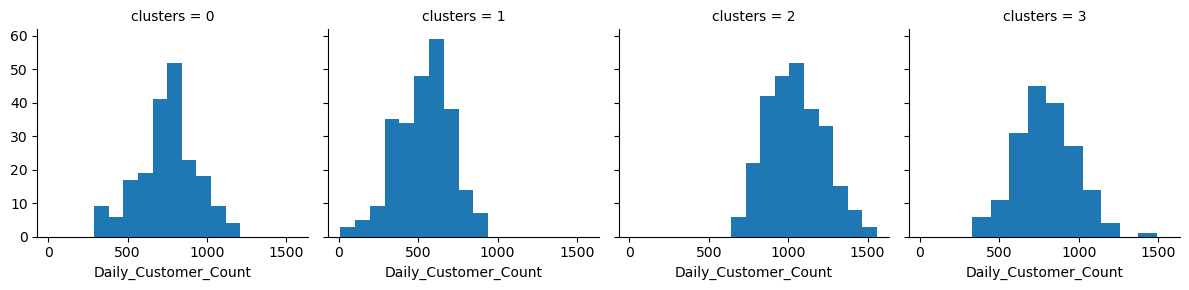

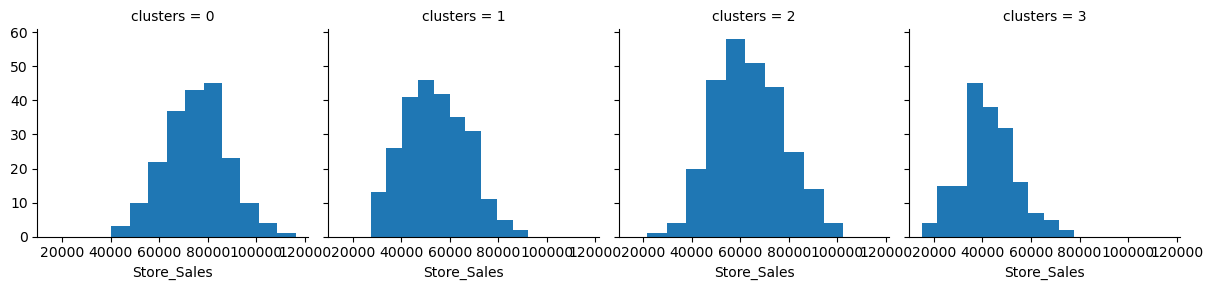

In [32]:
for c in dataset.drop(['clusters'], axis=1):
    grid= sns.FacetGrid(dataset, col='clusters')
    grid= grid.map(plt.hist, c)
plt.show()

In [45]:
# Saving Scikitlearn model
import joblib
joblib.dump(kmeans1, "kmeans_model.pkl")


['kmeans_model.pkl']

In [46]:
cluster_centers.to_csv("Clustered_Data.csv")

### Training and Testing the model accuracy using decision tree

In [47]:
# Split Dataset
from sklearn.model_selection import train_test_split
X = cluster_centers.drop(['clusters'],axis=1)
y = cluster_centers[['clusters']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [48]:
X_train

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
485,1440,1719,580,66050
249,1641,1976,620,46050
515,1735,2084,820,56440
214,1458,1725,750,75550
26,1475,1777,1100,25820
...,...,...,...,...
268,1206,1456,920,37130
564,1466,1743,1200,70810
447,1768,2123,860,49590
703,1791,2167,700,64320


In [49]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [51]:
# Confusion_Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
cm = confusion_matrix( y_test,y_pred)
print(cm)
print(classification_report(y_test, y_pred))
accuracy_score(y_test,y_pred)


[[51  5  7  0]
 [ 2 86  1  4]
 [ 2  1 67  3]
 [ 0  2  5 33]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.86        63
           1       0.91      0.92      0.92        93
           2       0.84      0.92      0.88        73
           3       0.82      0.82      0.82        40

    accuracy                           0.88       269
   macro avg       0.88      0.87      0.87       269
weighted avg       0.88      0.88      0.88       269



0.8810408921933085

### Saving the Decision tree model for future prediction

In [57]:
import pickle

In [58]:
filename = 'final_model.sav'

In [59]:
pickle.dump(model, open(filename, 'wb'))

In [61]:
#load the model from disk
load_model = pickle.load(open(filename, 'rb'))
result = load_model.score(X_test, y_test)
print(result, '% Acuuracy')

0.8810408921933085 % Acuuracy
